In [143]:
import json

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from random import choice

%matplotlib inline

In [300]:
def show_img(id_,dir_, ax=None, **kwargs):
    '''
    shows image with id_ in dir_
    '''
    if ax:
        return ax.imshow(imread(dir_ + f'{id_:012}.jpg'),**kwargs)
    else:
        return plt.imshow(imread(dir_ + f'{id_:012}.jpg'),**kwargs)
    
def reshape(flat):
    '''
    reshapes flattened coordinates to a 2-dim matrix [[x1,y1],[x2,y2],...]
    '''
    flat = np.array(flat[0])
    return flat.reshape(len(flat) // 2,2)
    
def show_img_annotated(id_, dir_, annotations_df):
    
    buildings = annotations_df.query(f'image_id == {id_}')
    flat_arrays = buildings.segmentation.values
    mats = [reshape(x) for x in flat_arrays]
    p = PatchCollection([Polygon(mat) for mat in mats],alpha=0.7)
    
    fig,ax = plt.subplots(nrows=1,ncols=1)
    show_img(id_,val_dir_ims,ax=ax)
    ax.add_collection(p)
    ax.set_xbound([0,300])
    ax.set_ybound([0,300])

# Initial data exploration

- NB to understand the data we have available and how to use the annotations

In [292]:
# Lets get a list of the validation (train is big not finished DL) images
val_dir = '../data/val_images/'
val_dir_ims = val_dir + 'images/'
ims = !ls {val_dir_ims}
len(ims)

60317

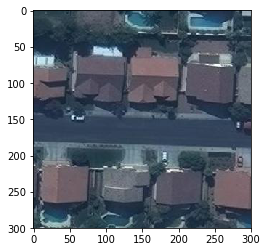

In [293]:
fig,ax = plt.subplots(nrows=1,ncols=1)

show_img(0,val_dir_ims,ax=ax)

In [294]:
# Lets take a look at the annotations
annotations = !ls {val_dir}*.json

small_annotation = json.loads(open(annotations[0]).read())
small_annotation_df = pd.DataFrame(small_annotation['annotations'])

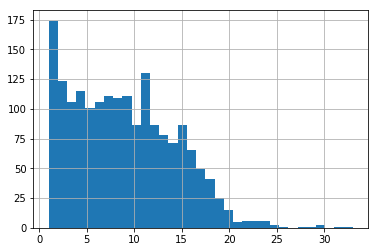

In [295]:
# how many buildings in images
counts = small_annotation_df.image_id.value_counts()
counts.hist(bins=counts.max())

- largest number of images have a single building

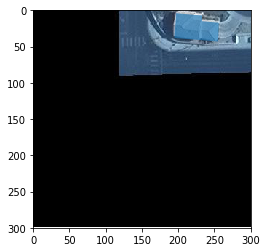

In [301]:
show_img_annotated(counts[counts == 1].index[0],val_dir_ims,small_annotation_df)

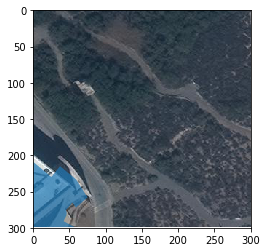

In [309]:
show_img_annotated(counts[counts == 1].index[6],val_dir_ims,small_annotation_df)

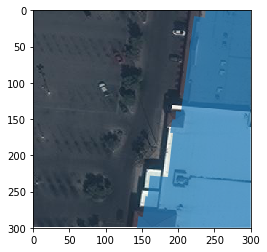

In [310]:
show_img_annotated(counts[counts == 1].index[14],val_dir_ims,small_annotation_df)

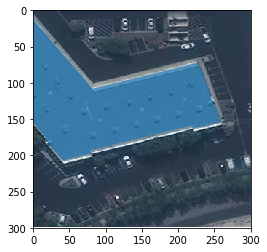

In [304]:
show_img_annotated(counts[counts == 1].index[10],val_dir_ims,small_annotation_df)

- some examples of images with lots of buildings

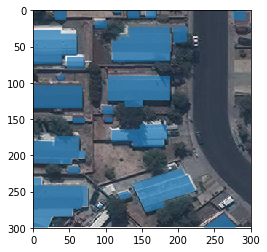

In [306]:
show_img_annotated(counts[counts > 16].index[10],val_dir_ims,small_annotation_df)

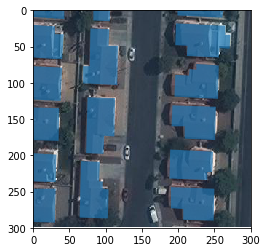

In [307]:
show_img_annotated(counts[counts > 16].index[-1],val_dir_ims,small_annotation_df)

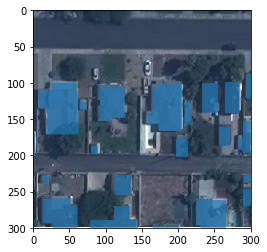

In [308]:
show_img_annotated(counts[counts > 16].index[24],val_dir_ims,small_annotation_df)

- need a function that will take a list of annotations and return a 300x300 mask array
- need a function that will take a 300x300 mask array, seperate into non-joined blocks and write a list of annotations